# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup('html', 'html.parser')
html = browser.html

In [5]:
print(html)

<html lang="en"><head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <meta name="description" content="">
  <title>Mars Temperature Data</title>

  <link rel="stylesheet" type="text/css" href="css/bootstrap.min.5.2.2.css">
  <link rel="stylesheet" type="text/css" href="css/temp.css">
</head>

<body>

  <main>
    <div class="container py-4">
      <header class="pb-3 mb-4 border-bottom">
        <a href="/" class="d-flex align-items-center text-dark text-decoration-none">
          <span class="fs-4">Mission To Mars</span>
        </a>
      </header>

      <div class="p-5 mb-4 bg-light rounded-3">
        <div class="container-fluid py-5">
          <h1 class="display-5 fw-bold">Mars Temperature Data</h1>
          <p class="col-md-8 fs-4">This is Mars data.</p>

          <table class="table">
            <tbody><tr>
              <th>id</th>
              <th>terrestrial_date</th>
              <th>sol</th>
              <th>ls</t

In [6]:
# Extract all rows of data
from splinter import Browser
from bs4 import BeautifulSoup
import time

# Open a browser instance
with Browser('chrome') as browser:
    # Define the URL for the Mars facts temperature site
    url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
    browser.visit(url)
    
    # Wait for a few seconds to ensure the page is fully loaded
    time.sleep(5)
    
    # Get the HTML content from the browser
    html = browser.html
    
    # Create a BeautifulSoup object
    soup = BeautifulSoup(html, 'html.parser')
    
    # Extract the table with class 'table'
    table = soup.find('table', class_='table')
    print("Table found:", bool(table))  # Check if the table is found
    
    if table:
        # Extract all rows of data
        rows = table.find_all('tr')
        print("Number of rows found:", len(rows))  # Number of rows found
        
        # Print all rows for inspection
        for row in rows:
            print(row)
    else:
        print("Table not found")


Table found: True
Number of rows found: 1868
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Define the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Initialize an empty list to store the data
data_list = []

# Loop through the scraped rows
for row in rows:
    # Find all 'td' elements in the row
    cells = row.find_all('td')
    # Get the text content from each cell
    cell_values = [cell.get_text(strip=True) for cell in cells]
    # Create a dictionary for the row using the column names
    row_dict = dict(zip(columns, cell_values))
    # Add the dictionary to the data list
    data_list.append(row_dict)

# Print the list of dictionaries
for row in data_list:
    print(row)


{}
{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}
{'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'min_tem

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_list)

In [9]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
# Convert relevant columns to numeric types
mars_df['id'] = mars_df['id'].astype(float)
mars_df['sol'] = mars_df['sol'].astype(float)
mars_df['ls'] = mars_df['ls'].astype(float)
mars_df['month'] = mars_df['month'].astype(float)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

# Convert terrestrial_date to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [12]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                         float64
terrestrial_date    datetime64[ns]
sol                        float64
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object

In [13]:
mars_df = mars_df.dropna(how='all').reset_index(drop=True)
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2.0,2012-08-16,10.0,155.0,6.0,-75.0,739.0
1,13.0,2012-08-17,11.0,156.0,6.0,-76.0,740.0
2,24.0,2012-08-18,12.0,156.0,6.0,-76.0,741.0
3,35.0,2012-08-19,13.0,157.0,6.0,-74.0,732.0
4,46.0,2012-08-20,14.0,157.0,6.0,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [36]:
# 1. How many months are there on Mars?
months = mars_df['month'].nunique()
print(f"There are {months} months in the Mars dataset")

There are 12 months in the Mars dataset


In [38]:
# 2. How many sols (Martian days) worth of data are there?
sols = mars_df['sol'].nunique()
print(f"There are {sols} martian days in the Mars dataset")

There are 1867 martian days in the Mars dataset


In [16]:
# 3. What is the average minimum temperature by month?
avg_temp = mars_df.groupby('month')['min_temp'].mean()
print(avg_temp)

month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64


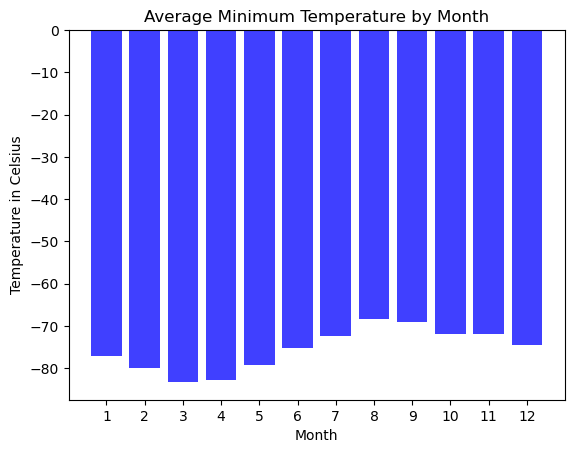

In [17]:
# Plot the average minimum temperature by month
plt.bar(avg_temp.index, avg_temp, color='b', alpha=0.75)

# Set the x ticks tied to months 1-12 and add the labels
plt.xticks(range(1, 13))
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Show the plot
plt.show()

In [18]:
# Calculate the average temperature by month
avg_temp = mars_df.groupby('month')['min_temp'].mean()

# Sort the temperatures from lowest to highest (ascending order)
avg_temp_sorted = avg_temp.sort_values(ascending=True)

# Print the sorted Series
print(avg_temp_sorted)

month
3.0    -83.307292
4.0    -82.747423
2.0    -79.932584
5.0    -79.308725
1.0    -77.160920
6.0    -75.299320
12.0   -74.451807
7.0    -72.281690
11.0   -71.985507
10.0   -71.982143
9.0    -69.171642
8.0    -68.382979
Name: min_temp, dtype: float64


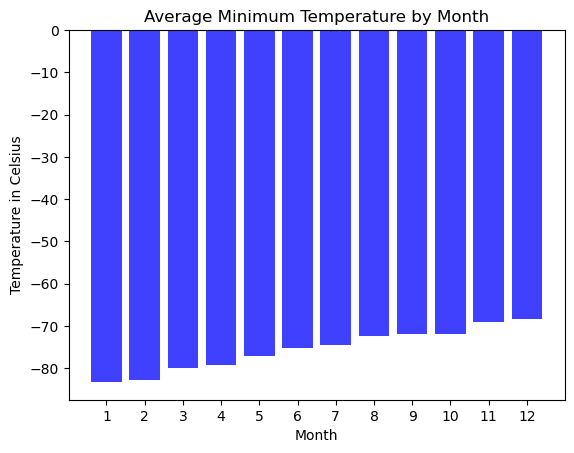

In [51]:
# Sort the temperatures from coldest to warmest
sort_temp = avg_temp.sort_values()

# Plot the average minimum temperature by month
plt.bar(sort_temp.index, avg_temp.sort_values(ascending=True), color='b', alpha=0.75)

# Set the x ticks tied to months 1-12 and add the labels
plt.xticks(range(1, 13))
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Show the plot
plt.show()

In [69]:
# Identify the coldest month
coldest_month = avg_temp.idxmin()
coldest_temp = avg_temp.min()

# Identify the warmest month
warmest_month = avg_temp.idxmax()
warmest_temp = avg_temp.max()

# Print the results
print(f"The coldest month is {coldest_month} with an average minimum temperature of {coldest_temp}°C.")
print(f"The warmest month is {warmest_month} with an average minimum temperature of {warmest_temp}°C.")


The coldest month is 3.0 with an average minimum temperature of -83.30729166666667°C.
The warmest month is 8.0 with an average minimum temperature of -68.38297872340425°C.


In [25]:
# 4. What is the average pressure by month?
avg_pressure = mars_df.groupby('month')['pressure'].mean()
print(avg_pressure)

month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


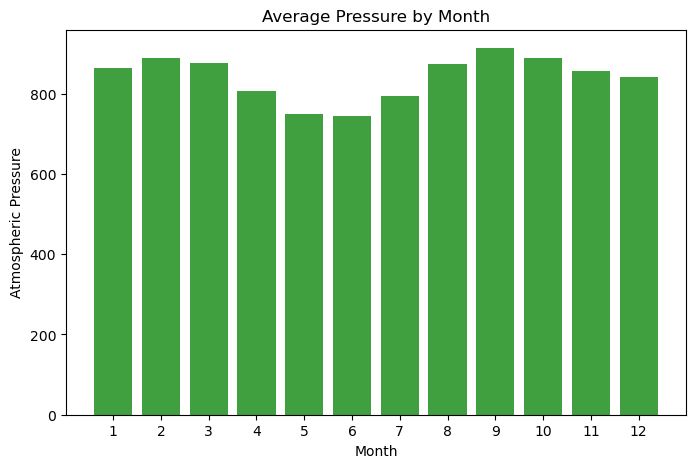

In [26]:
# Plot the average pressure by month
plt.figure(figsize=(8, 5))
plt.bar(avg_pressure.index, avg_pressure, color='g', alpha=0.75)

# set the labels for the plot
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')


# Set x-ticks to the specified months 
plt.xticks(range(1, 13))

# show the plot
plt.show()

In [73]:
sort_pressure = avg_pressure.sort_values(ascending=True)
sort_pressure

month
6.0     745.054422
5.0     748.557047
7.0     795.105634
4.0     806.329897
12.0    842.156627
11.0    857.014493
1.0     862.488506
8.0     873.829787
3.0     877.322917
10.0    887.312500
2.0     889.455056
9.0     913.305970
Name: pressure, dtype: float64

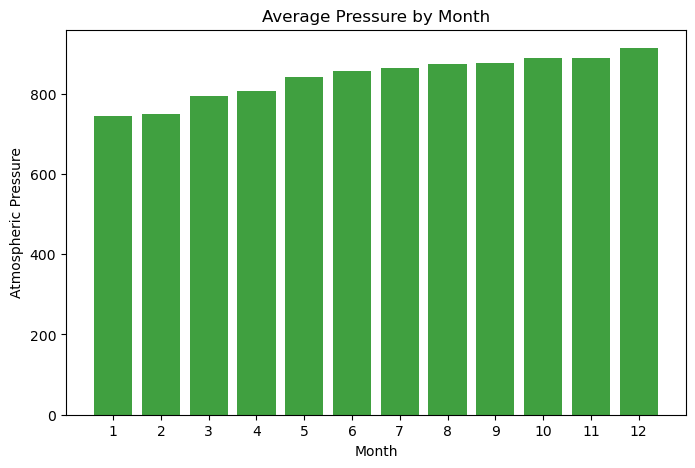

In [28]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
plt.figure(figsize=(8, 5))
plt.bar(avg_pressure.index, avg_pressure.sort_values(ascending=True), color='g', alpha=0.75)

# set the labels for the plot
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')


# Set x-ticks to the specified months 
plt.xticks(range(1, 13))

# show the plot
plt.show()

In [71]:
# Calculate the average pressure by month
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Identify the lowest pressure month
lowest_pressure_month = avg_pressure_by_month.idxmin()
lowest_pressure = avg_pressure_by_month.min()

# Identify the highest pressure month
highest_pressure_month = avg_pressure_by_month.idxmax()
highest_pressure = avg_pressure_by_month.max()

# Print the results
print(f"The lowest pressure month is {lowest_pressure_month} with an average pressure of {lowest_pressure} Pa.")
print(f"The highest pressure month is {highest_pressure_month} with an average pressure of {highest_pressure} Pa.")


The lowest pressure month is 6.0 with an average pressure of 745.0544217687075 Pa.
The highest pressure month is 9.0 with an average pressure of 913.3059701492538 Pa.


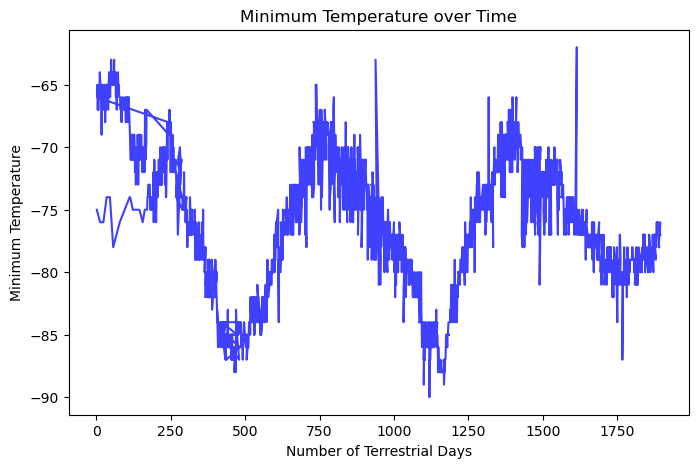

In [68]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(8, 5))
plt.plot(mars_df['id'], mars_df['min_temp'], color='b', alpha=0.75)
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')

plt.show()

#### Minimum Temperature
The coldest month is 3.0 with an average minimum temperature of -83.30729166666667°C. \
The warmest month is 8.0 with an average minimum temperature of -68.38297872340425°C.

#### Atmospheric Pressure
The lowest pressure month is 6.0 with an average pressure of 745.0544217687075 Pa. \
The highest pressure month is 9.0 with an average pressure of 913.3059701492538 Pa.

#### Year Length
The average minimum temperatures follow an up and down pattern with our data beginning at a peak period and ending on the way up \
and has an outlier spike on the way down to the lowest periods. \
Compare the upper and lower peaks to guage a revolution around the sun appproximately. \
The first upper peak starts slightly around 0 and ends around 750. (750) \
The second upper peak starts < 750 and ends approx 1400. (650) \
The first lower starts around 475 and ends around 1125. (650) \
The second lower starts around 1125 and ends > 1750. (625) \
Average our 4 approximations; (750 + 650 + 650 + 625) / 4 = 668.75.\
This is pretty close to the actual figures per Nasa, <https://science.nasa.gov/mars/facts/> \
Which states there are 669.6 sols and 687 terrestrial days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
mars_df.to_csv('../Data_Output/mars_temperature_data.csv', index=False)

In [74]:
browser.quit()